Short introduction to Python for
Matlab users


Claus Führer, Numerical Analysis, Matematikcentrum

Najmeh Abiri, Computational Biology, Fysikum


# Python Compact - Part 1



# What do we cover in this introduction lecture?

  1. [Preparation](#preparation)    
  1. [Elementary Datatypes](#elemdatatypes) 
  1. [Program Flow](#programflow)  
  1. [Container Types](#container)  
  1. [Functions](#functions) 
  1. [Arrays](#arrays) 
  1. [Plotting](#plotting)
  1. [Exceptions](#exceptions)
  1. [Training Tasks](#tasks)

## What is also interesting to know?

* Testing, Profiling
* Iterators

## Preparation <a id="preparation"></a>

Everywhere in this course: in files, in shells we start with

In [31]:
from scipy import *
from matplotlib.pyplot import *
from numpy import *

#### Tools you will need in this course:

* Ipython
* Spyder
* jupyter-notebook

## Elementary datatypes <a id="elemdatatypes"></a>
### Numeric Types

In [67]:
i = 1            #  an integer
x = 2.           # a float
z = y = 3.e-8
c = 1.-3         # automatic type conversion
d = 1.+3.j       # a complex number


In [69]:
print(i,x,y,z,c,d)

1 2.0 3e-08 3e-08 -2.0 (1+3j)


## Elementary datatypes  
### Strings

In [7]:
text = 'We learn Python'
speed = 'fast'
how = 'fast. ' if speed else 'slow. '   # note the conditioned assignment
now = text + ' ' + how                  # concatination by "+"
2 * now

'We learn Python fast. We learn Python fast. '

## Summary: Elementary Datatypes

* we saw integers, floats, complex numbers, Booleans and strings
* we saw different ways to assign values to a variable
* we saw concatination of strings
* we saw `print()` and `type()`


## Program Flow:  Block commands <a id="programflow"></a>

The flow is controlled by loops, conditional statements and functions

In [8]:
for i in range(3):
    print(i)
    j = i**2
    print(j)
    

0
0
1
1
2
4


Mind the intendation!

#### Nested Loop:

In [9]:
for i in range(5):
    for j in range(i + 1):
        print( (i,j), end = ' ')
    print('\n')      # Makes a new line

(0, 0) 

(1, 0) (1, 1) 

(2, 0) (2, 1) (2, 2) 

(3, 0) (3, 1) (3, 2) (3, 3) 

(4, 0) (4, 1) (4, 2) (4, 3) (4, 4) 



#### Conditional statement

In [10]:
b = False
if b :
    j = 2 * j
else:
    j = None
print(j)

None


#### Loop constructions: `break`, `else`

In [11]:
j = 30
for i in range(100):
    if i == j:
        break
else:
    raise Exception('j not found')
print('j found')

j found


## Container types <a id="container"></a>

### Lists


In [12]:
a = [1,2,'aha']
print(a)
b = [1,a]
a[0]
print(a[0])
print(b[1][2])

[1, 2, 'aha']
1
aha


In [13]:
a+b

[1, 2, 'aha', 1, [1, 2, 'aha']]

In [14]:
c = list(range(0,8))
print(c[-1])
print(c[-4:])
print(c[0:2]) # Note the "hotel booking" rule.  

7
[4, 5, 6, 7]
[0, 1]


### List comprehension

In [15]:
base_list = [5,9,22,38]

new_list = [l**2+1 for l in base_list]

other_list=[l+1 for l in base_list if l%2 == 0 ]

print(new_list,end=3 * '\n')

print(other_list)

[26, 82, 485, 1445]


[23, 39]


#### List Operations

note the *inplace* operations

In [70]:
L=[1,2,3,29,-10]
L.sort()
print('sorted list L=', L)
L.reverse()
print('reversed list L=',L)
L.append(70)
print('extended list L=', L)
L.pop()
print('last element removed L=',L)

sorted list L= [-10, 1, 2, 3, 29]
reversed list L= [29, 3, 2, 1, -10]
extended list L= [29, 3, 2, 1, -10, 70]
last element removed L= [29, 3, 2, 1, -10]


Summary

* Lists and lists of lists
* indexing and slices
* negative indexing
* 'Hotel'booking rule
* List comprehension
* `list(range(...))`

### Dictionaries

In [71]:
truck={'bodies':['frWheel','reWheel','Chassis','Cabine','Load'],
      'total length':15,'total weight':30000}

In [72]:
truck.keys()

dict_keys(['bodies', 'total length', 'total weight'])

### Tuples

In [73]:
a=2,3
print(a)
b=('anna',23)
print(b)
print(a+b)
print(b[1])

(2, 3)
('anna', 23)
(2, 3, 'anna', 23)
23


A tuple is an immutable list. What means immutable?

In [65]:
b[1]=-2

TypeError: 'int' object does not support item assignment

Note that the error above happens on purpose: we can't reassign an element of a tuple

#### Warning:  Changing in sub list has side effects!

In [21]:
a=[1,2,3]
b=[4,5,a]
print(b)
a[2]=-300
print(b)

[4, 5, [1, 2, 3]]
[4, 5, [1, 2, -300]]


In [22]:
b=tuple(b)
print(b)
a[2]=70
print(b)

(4, 5, [1, 2, -300])
(4, 5, [1, 2, 70])


In [23]:
b=[1,2]
a=b
b[1]=-234
print(a[1])

-234


#### Copy removes these side effects

In [24]:
a=b.copy()
b[1]=1
a[1]

-234

### Unpacking , Packing

In [25]:
a=1
b=b
c,d=a,b

*or even*

In [26]:
b,a = a,b  # the swapping trick

### Summary:
* lists, list indexing, slices
* dictionaries, keys, values, items
* tuples, immutable
* copy
* packing, unpacking

## Functions <a id="functions"></a>

In [27]:
def my_func(p1, p2, p3 = None):
    a = p1*p2 + p3 if p3 != None else p1*p2
    b = p1**2
    return a, b

In [28]:
r1, r2 = my_func(1, 2, 5)

** `lambda` Functions: Defining functions on the fly **

In [34]:
f = lambda x: sin(x) * cos(x)

f(pi)

-1.2246467991473532e-16

### Passing arguments

- by position
- by key
- when mixing: **always** first those by position

In [35]:
def my_func(p1, p2 ,p3):
    pass                     # a statement which does nothing, just to please the syntax

In [36]:
my_func(2, 3, 25)
my_func(p3 = 25, p1 = 2, p2 = 3)     # note, how default values are defined
my_func(2, 3, p3 = 25)   

### Starred Arguments

You can expand a list to form positional arguments 
and a dictionary to form keyword arguments of a function

In [37]:
li = [2, 3, 25]
di={'p1':2, 'p2':3, 'p3':25}
my_func(*li)
my_func(**di)

### Scope of a variable

In [38]:
a = 3; l=[1, 2, 3]
def func1(b):
    return a * b   # a is a global variable

def func2(b):
    a = 17         # a is a local variable
    return a * b

In [39]:
print(func1(3))
a = -10              # Be aware of side effects
print(func2(3))
print(a)

9
51
-10


## Arrays and Linear Algebra <a id="arrays"></a>

In [75]:
from scipy import *
from scipy.linalg import *
from numpy import *

a vector ...

In [76]:
v = array([1.,2.,3.])
w = array([1.,0.,1])
v.reshape((3,))

array([1., 2., 3.])

### Dot product, cross product, outer product

In [77]:
a = v @ w  #  or  a=dot(v,w)
A = outer(v,w)
u = cross(v,w)

In [78]:
print(a,A,u)

4.0 [[1. 0. 1.]
 [2. 0. 2.]
 [3. 0. 3.]] [ 2.  2. -2.]


### Filling vectors

In [45]:
v = linspace(0,3,10)  # filling with equidistant floats
i = arange(0,3)  # filling with integers 
o = ones((3,))
z = zeros((3,))


## Matrices are two dimensional arrays

In [46]:
A = array([[1.,2.,7],[7,9,13],[-1,2,6.]])
A.shape

(3, 3)

a particular element is adressed by a **dubble index**

In [47]:
trace = A[0,0] + A[1,1] + A[2,2]
print(trace)

16.0


the same but with list comprehension: 

In [48]:
trace = sum( [A[i,i] for i in range(A.shape[0])] )
print(trace)

16.0


### Filling 2D arrays

In [50]:
from numpy.random import *

In [51]:
I = eye(3)
Z = zeros((3,3))        # the argument is a tuple
Z = zeros_like(I)
F = 5. * ones((3,3))    # the argument is a tuple
R = rand(3,3)           # the argument is *not* a tuple
a = pi/3
Rot = array([[cos(a), sin(a)],
             [-sin(a),cos(a)]])     

### Operations on arrays

In [52]:
F @ Z
v  = array([3,4])
vr = Rot @ v

from scipy.linalg import solve

abs(solve(Rot,vr) - v) < 1.e-8  # mind round-off

array([ True,  True])

### Views   

In [53]:
f = arange(0, 10)
F = f.reshape(2, 5)
FT = F.T           # the transpose
F[-1,-1] = 17
print(FT[-1, -1], f[-1]) # everything affected

17 17


#### Universal functions

Many functions operate directly on arrays -- componentwise

In [54]:
sin(F)
abs(F)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8, 17]])

Addition, multiplication, division are **elementwise** operations on arrays

In [55]:
print(F)
print(F + F)
print(F * F)

[[ 0  1  2  3  4]
 [ 5  6  7  8 17]]
[[ 0  2  4  6  8]
 [10 12 14 16 34]]
[[  0   1   4   9  16]
 [ 25  36  49  64 289]]


#### Array Examples

A projection matrix $P$ and its eigenvalues and eigenvectors

$$
P = \mathrm{I} - \frac{v v^T}{v^T v}
$$

In [56]:
from scipy.linalg import *

v = array([1., 0., 0., 1., 5.])
P = eye(v.shape[0]) - outer(v, v)/(v @ v)

evalue, evector = eig(P)
print('P v =', P @ v, end=2*'\n')
print('Eigenvalues: ',evalue,
      'Eigenvectors: ', evector,sep=2*'\n')

P v = [2.22044605e-16 0.00000000e+00 0.00000000e+00 2.22044605e-16
 0.00000000e+00]

Eigenvalues: 

[1.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j]

Eigenvectors: 

[[ 0.98130676 -0.19245009  0.22187058  0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [-0.03774257 -0.19245009 -0.9637218   0.          0.        ]
 [-0.18871284 -0.96225045  0.14837025  0.          0.        ]]


In [57]:
for i in range(evalue.shape[0]):
    if allclose(evector[:,i], -v/norm(v,2)) or allclose(evector[:,i],-v/norm(v,2)):
        print('v is an eigenvector of the projection matrix corresponding to eigenvalue ',evalue[i].real)

v is an eigenvector of the projection matrix corresponding to eigenvalue  0.0


### Boolean Arrays

In [58]:
A = rand(4,4)
small = abs(A) < 0.5

C = A.copy()
C[small] = 0
print(A,C,small,sep=2*'\n')

[[0.02286666 0.65301933 0.06443776 0.25158706]
 [0.62304028 0.69956509 0.12564128 0.28541975]
 [0.16453795 0.57512472 0.45438806 0.30268065]
 [0.21101822 0.53980651 0.68530406 0.66864103]]

[[0.         0.65301933 0.         0.        ]
 [0.62304028 0.69956509 0.         0.        ]
 [0.         0.57512472 0.         0.        ]
 [0.         0.53980651 0.68530406 0.66864103]]

[[ True False  True  True]
 [False False  True  True]
 [ True False  True  True]
 [ True False False False]]


Continuation from eigenvalue example above 

(note the decorator `vectorize` to make a universal function)

In [59]:
@vectorize
def near(x, y, eps = 1.e-8):
    return (y-eps) <  x.real < (y+eps) and -eps < x.imag < eps

if (near(abs(evalue),1) + near(evalue,0)).all():
    print('All eigenvalues of a symmetric projection matrix are either +- 1 or 0')

All eigenvalues of a symmetric projection matrix are either +- 1 or 0


## Elementary Plotting <a id="plotting"></a>

write in IPython as one of the first commands `%matplotlib` when you want to want the plots to be embedded in the current session.

In [60]:
%matplotlib inline

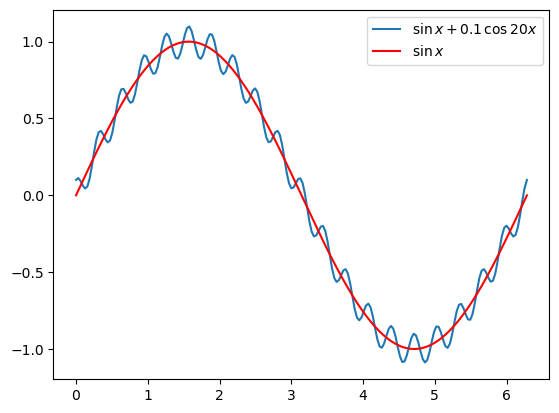

In [61]:

x = linspace(0, 2 * pi, 200)
plot(x, sin(x) + 0.1*cos(20*x), label='$\sin\,x+0.1\,\cos\,20x$')
plot(x, sin(x), 'r', label='$\sin\,x$')
legend(loc = 'best')

## Exceptions <a id='exceptions'></a>


In [62]:
x_list = [1, 2, 3, 0, 23, 65]
y = []

for x in x_list:
    try:
        y.append(1./x)
    except ZeroDivisionError:
        y.append('no inverse')

print(x_list, y, sep='\n')        

[1, 2, 3, 0, 23, 65]
[1.0, 0.5, 0.3333333333333333, 'no inverse', 0.043478260869565216, 0.015384615384615385]


Important Exception Types

* IndexError
* ValueError
* NameError
* ZeroDivisionError
* SyntaxError

... or just unspecified.





# Task:  <a id="tasks"></a>

1. Generate a vector with random numbers. Check all its elements and count the number of sign changes.
2. write a function which takes an axis-label ('x', 'y', 'z') and an angle as input and returns a rotation matrix, e.g., `rot3D(2*pi,'x')` should return a 3D rotation matrix about the 'x'-axis.
3. Test if the product of three rotation matrices is orthogonal and has determinant 1
4. Compute the eigenvalues of this composed rotation matrix and plot them as small stars in the complex plane.
